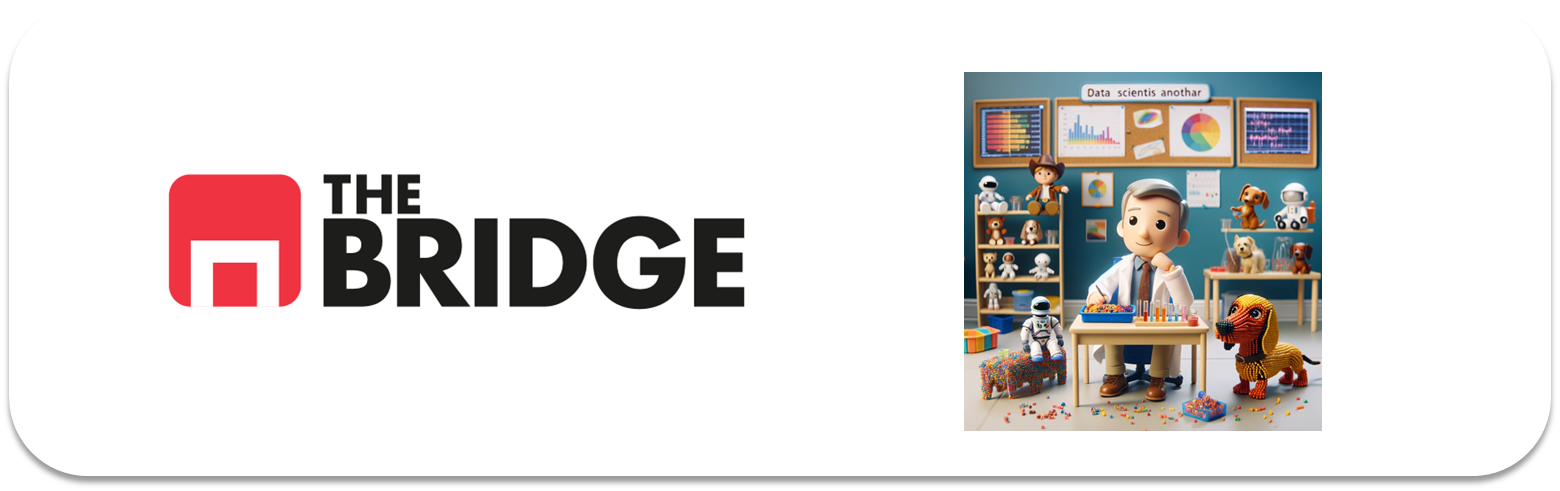

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [91]:
import seaborn as sns
import pandas as pd
import matplotlib



### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```python sns.load_dataset(<nombre_del_dataset)``` a una variable "df_titanic"

In [92]:
# Localizo el nombre
data=sns.get_dataset_names()
print(data)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [93]:
# El dataset es titanic
df_titanic=sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [94]:
df_titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [95]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [96]:
# Muestra columnas con NaN y las guarda en una lista
columnas_nan=[]
for col in df_titanic:
    if df_titanic[col].isna().any():
        columnas_nan.append(col)
print(columnas_nan)

['age', 'embarked', 'deck', 'embark_town']


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [97]:
def por_nulos(df):
    porcentaje_nulos={}
    for col in df_titanic:
        valor_nulo=df_titanic[col].isna().sum()/len(df_titanic[col])*100
        porcentaje_nulos[col]=valor_nulo.round(2)
    return print(porcentaje_nulos)

In [98]:
por_nulos(df_titanic)

{'survived': 0.0, 'pclass': 0.0, 'sex': 0.0, 'age': 19.87, 'sibsp': 0.0, 'parch': 0.0, 'fare': 0.0, 'embarked': 0.22, 'class': 0.0, 'who': 0.0, 'adult_male': 0.0, 'deck': 77.22, 'embark_town': 0.22, 'alive': 0.0, 'alone': 0.0}


'survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Survived|Valor booleano que indica 0 si no sobrevivio/ 1 si sobrevivio||||
|pclass| categoria del pase,1 primera, 2 segunda, 3 tercera||||
|sex| genero de la persona|||Valor bool|
|age|edad||||
|sibsp| hermanos/as, maridos, esposas a bordo (familiares)|||categoria|
|fare|tarifa de compra del billete||||
|embarked|puerto de embarcacion, S= Southampton, C=Cherbourg Q=Queenstown|||ver si coincide con columna embark_town|
|class| igual que pclass|||Ver si coincide con pclass|
|who| columna que indica si es hombre, mujer o niño|||poca importancia, ya tenemos (age, sex)|
|adult_male| si era un varon adulto o no||||
|embark_town|Ciudad de embarque||||
|alive| si sigue vivo o no||||
|alone| si se quedo sin familia o no||||

In [99]:
# La columna deck, contiene muchos nulos, no nos da demasiada informacion saber en que cubierta estaban
# Eliminamos deck y parch ya que el resto tienen bastantes valores

df_titanic.drop(columns=["parch","deck"],inplace=True)

In [100]:
# Veo si hay columnas "repetidas"
repetidas=df_titanic[["pclass","class"]]

# Cambio los valores de pclass // cambiar los valores de class es mas complicado ya que es un tipo categoria
df_titanic.loc[df_titanic["pclass"]==1,"pclass"]="First"
df_titanic.loc[df_titanic["pclass"]==2,"pclass"]="Second"
df_titanic.loc[df_titanic["pclass"]==3,"pclass"]="Third"

# Comparo si son iguales fila a fila, si lo son, elimino la columna pclass
son_iguales = (df_titanic["pclass"] == df_titanic["class"])

# Muestra las filas donde las columnas son diferentes
diferentes = df_titanic[~son_iguales]
print("Filas donde las columnas son diferentes:")
print(diferentes[["pclass","class"]])

Filas donde las columnas son diferentes:
Empty DataFrame
Columns: [pclass, class]
Index: []


C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_16424\3026520186.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'First' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_titanic.loc[df_titanic["pclass"]==1,"pclass"]="First"


In [101]:
# Elimino pclass
df_titanic.drop(columns="pclass", inplace=True)

In [102]:
df_titanic.head(5)

,survived,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Survived|Valor booleano que indica 0 si no sobrevivio/ 1 si sobrevivio||||
|~~pclass~~| ~~categoria del pase,1 primera, 2 segunda, 3 tercera~~|-|-|-|
|sex| genero de la persona|||Valor bool|
|age|edad||||
|sibsp| hermanos/as, maridos, esposas a bordo (familiares)|||categoria|
|fare|tarifa de compra del billete||||
|embarked|puerto de embarcacion, S= Southampton, C=Cherbourg Q=Queenstown|||ver si coincide con columna embark_town|
|class| igual que pclass|||Ver si coincide con pclass|
|who| columna que indica si es hombre, mujer o niño|||poca importancia, ya tenemos (age, sex)|
|adult_male| si era un varon adulto o no||||
|embark_town|Ciudad de embarque||||
|alive| si sigue vivo o no||||
|alone| si se quedo sin familia o no|||comparar con survived|


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [103]:
# Hago los cambios
df_titanic.loc[df_titanic["embarked"]=="S","embarked"]="Southampton"
df_titanic.loc[df_titanic["embarked"]=="Q","embarked"]="Queenstown"
df_titanic.loc[df_titanic["embarked"]=="C","embarked"]="Cherbourg"
df_titanic.sample()

,survived,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
476,0,male,34.0,1,21.0,Southampton,Second,man,True,Southampton,no,False


In [104]:
# Veo si hay columnas "repetidas"
repetidas_2=df_titanic[["embarked","embark_town"]]

# Comparo si son iguales fila a fila, si lo son, elimino la columna pclass
son_iguales_2 = (df_titanic["embarked"] == df_titanic["embark_town"])

# Muestra las filas donde las columnas son diferentes
diferentes_2 = df_titanic[~son_iguales_2]
print("Filas donde las columnas son diferentes:")
print(diferentes_2[["embarked","embark_town"]])

Filas donde las columnas son diferentes:
    embarked embark_town
61       NaN         NaN
829      NaN         NaN


In [105]:
# Como todos los valores son iguales, menos los de la fila de indices 61 y 829, que no los puede comparar por ser NaN, procedemos a eliminar embark_town
df_titanic.drop(columns="embark_town", inplace=True)
df_titanic.sample()

,survived,sex,age,sibsp,fare,embarked,class,who,adult_male,alive,alone
144,0,male,18.0,0,11.5,Southampton,Second,man,True,no,True


In [106]:
# Comparamos tambien alive y survived que tienen mala pinta...
# Veo si hay columnas "repetidas"
repetidas_3=df_titanic[["survived","alive"]]
df_titanic.loc[df_titanic["alive"]=="yes","alive"]=1
df_titanic.loc[df_titanic["alive"]=="no","alive"]=0

# Comparo si son iguales fila a fila, si lo son, elimino la columna pclass
son_iguales_3 = (df_titanic["survived"] == df_titanic["alive"])

# Muestra las filas donde las columnas son diferentes
diferentes_3 = df_titanic[~son_iguales_3]
print("Filas donde las columnas son diferentes:")
print(diferentes_3[["survived","alive"]])

Filas donde las columnas son diferentes:
Empty DataFrame
Columns: [survived, alive]
Index: []


In [107]:
# Como son iguales me cargo a alive
df_titanic.drop(columns="alive", inplace=True)
df_titanic.sample()

,survived,sex,age,sibsp,fare,embarked,class,who,adult_male,alone
82,1,female,NaN,0,7.7875,Queenstown,Third,woman,False,True




|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Survived|Valor booleano que indica 0 si no sobrevivio/ 1 si sobrevivio||||
|~~pclass~~| ~~categoria del pase,1 primera, 2 segunda, 3 tercera~~|-|-|-|
|sex| genero de la persona|||Valor bool|
|age|edad||||
|sibsp| hermanos/as, maridos, esposas a bordo (familiares)|||categoria|
|fare|tarifa de compra del billete||||
|embarked|puerto de embarcacion, S= Southampton, C=Cherbourg Q=Queenstown|||ver si coincide con columna embark_town|
|class| igual que pclass|||Ver si coincide con pclass|
|who| columna que indica si es hombre, mujer o niño|||poca importancia, ya tenemos (age, sex)|
|adult_male| si era un varon adulto o no|||no nos da mucha informacion ya tenemos (sex, age)|
|~~embark_town~~|~~Ciudad de embarque~~||||
|~~alive~~|~~si sigue vivo o no~~|-|-|~~ver si es igual que la columna survived~~|
|alone| si se quedo sin familia o no||||

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [108]:
# Calculo la cardinalidad para ver los tipos de variables, supongo que para mas de 10 valores mi varible es numerica y si tiene mas del 50% de los datos es continua

def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp


In [109]:
card_tipo(df_titanic,10,50)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224467,int64,Binaria
sex,2,0.224467,object,Binaria
age,88,9.876543,float64,Numerica discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria
alone,2,0.224467,bool,Binaria




|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Survived|Valor booleano que indica 0 si no sobrevivio/ 1 si sobrevivio|Binaria|0||
|~~pclass~~| ~~categoria del pase,1 primera, 2 segunda, 3 tercera~~|-|-|-|
|sex| genero de la persona|Binaria|1||
|age|edad|Numerica discreta|1||
|sibsp| hermanos/as, maridos, esposas a bordo (familiares)|Categórica|3|No creo que la use|
|fare|tarifa de compra del billete|Numerica discreta||2|
|embarked|puerto de embarcacion, S= Southampton, C=Cherbourg Q=Queenstown|Categórica|3|ver si coincide con columna embark_town|
|class| igual que pclass|Categórica|2|Ver si coincide con pclass|
|who| columna que indica si es hombre, mujer o niño|Categórica|3|poca importancia, ya tenemos (age, sex)|
|adult_male| si era un varon adulto o no|Binaria|3|no nos da mucha informacion ya tenemos (sex, age)|
|~~embark_town~~|~~Ciudad de embarque~~|-|-|-|
|~~alive~~|~~si sigue vivo o no~~|-|-|~~ver si es igual que la columna survived~~|
|alone| si se quedo sin familia o no|Binaria|2||

### #2.1 Categóricas

In [110]:
# Vamos a pintar las frecuencias de cada columna y como se distribuye
from bootcampviztools import pinta_distribucion_categoricas, plot_multiple_boxplots

def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts() # Values_counts() me da las frecuencias absolutas
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  # Si activo el argumento normalize me da las relativas en tanto por 1, el argumento porcentaje de la función me permite pasarlo a tanto por cien

    # Crear DataFrame con ambas frecuencias
    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df

In [111]:
# Analizamos las columnas Survived, sex,adult_male y alone

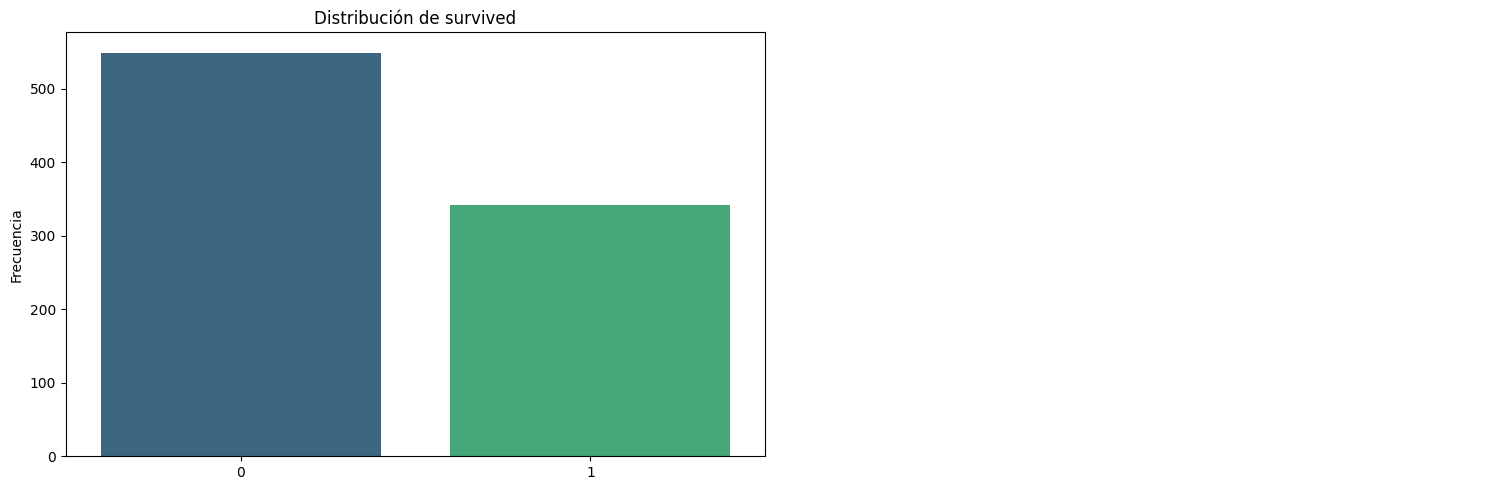

,Frecuencia Absoluta,Frecuencia Relativa
survived,,
0,549,61.616162
1,342,38.383838


In [112]:
pinta_distribucion_categoricas(df_titanic,["survived"], giro=0)
frecuencias(df_titanic,"survived")


* Es nuestra variable principal de la cual vamos a hacer nuestro analisis
* Se observa una mayoria de casos donde no sobrevivieron 61.6% frente al 38.4% (de 891)
* Esto me lleva a una pregunta, de las mas de 2200 personas que habia solo tenemos datos de 891 personas, donde estan el resto de datos?


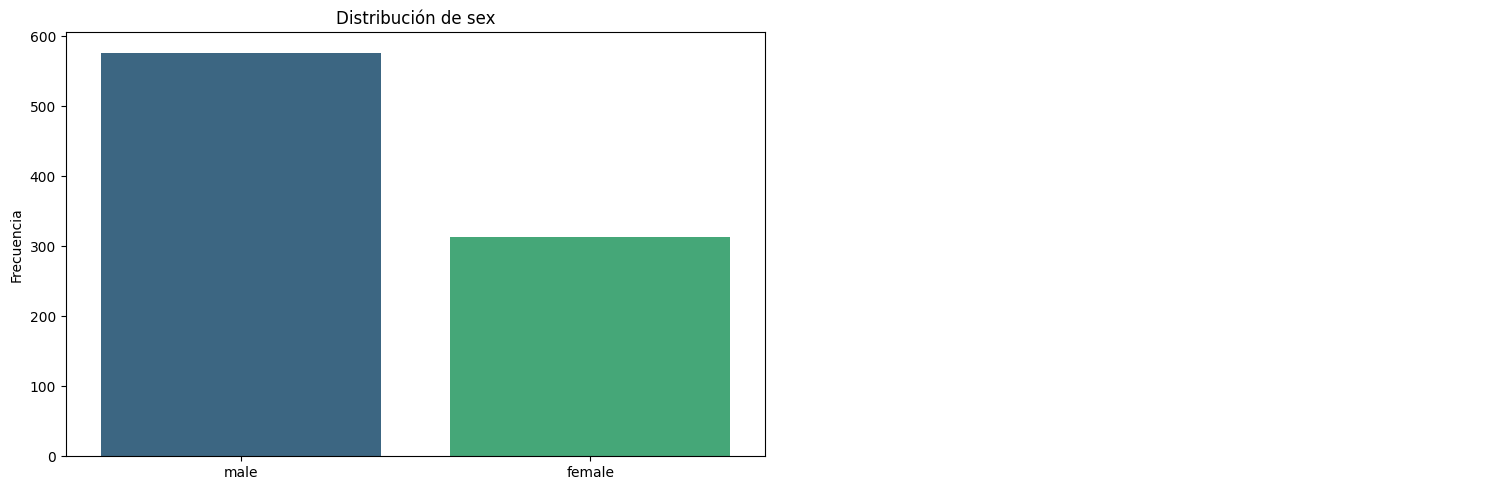

,Frecuencia Absoluta,Frecuencia Relativa
sex,,
male,577,64.758698
female,314,35.241302


In [113]:
pinta_distribucion_categoricas(df_titanic,["sex"], giro=0)
frecuencias(df_titanic,"sex")

* Se observa una mayoria de casos de hombres 64.8 % frente al 35.2% (de 891)
* Seria interesante saber si junto con survived esta proporcion varia o no
* Dato para estudio demografico


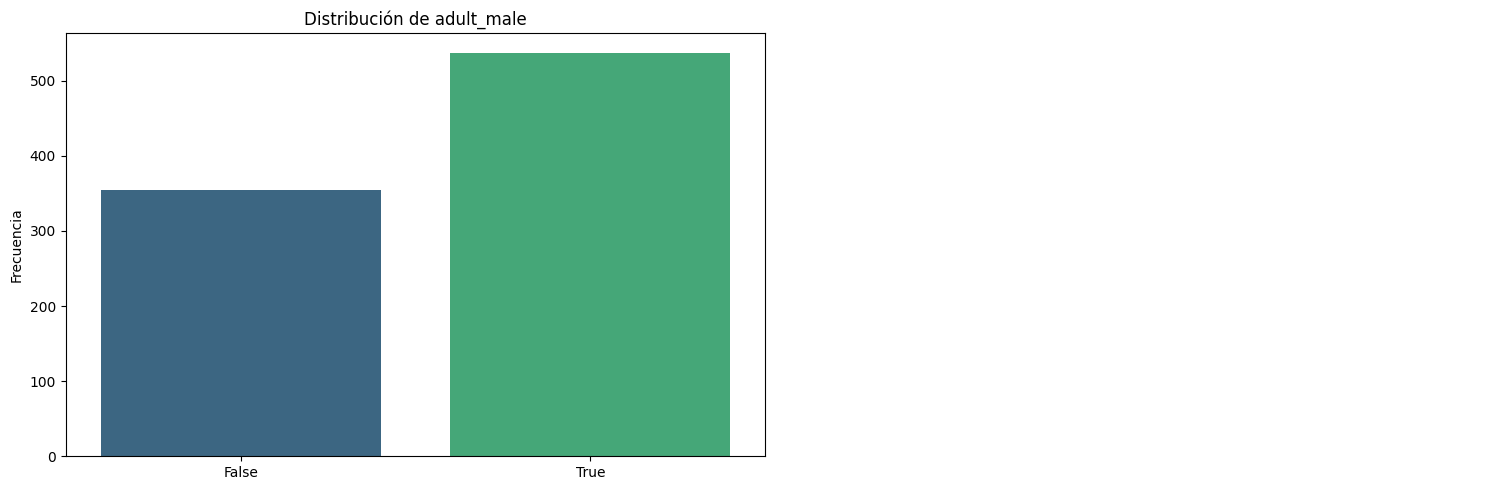

,Frecuencia Absoluta,Frecuencia Relativa
adult_male,,
True,537,60.26936
False,354,39.73064


In [114]:
pinta_distribucion_categoricas(df_titanic,["adult_male"], giro=0)
frecuencias(df_titanic,"adult_male")

* Se observa una mayoria de casos de hombres 60.2 % frente al 39.7% de mujeres y niños (de 891)
* Esta variable no nos da mas informacion que el resto de columnas
* Dato para estudio demografico


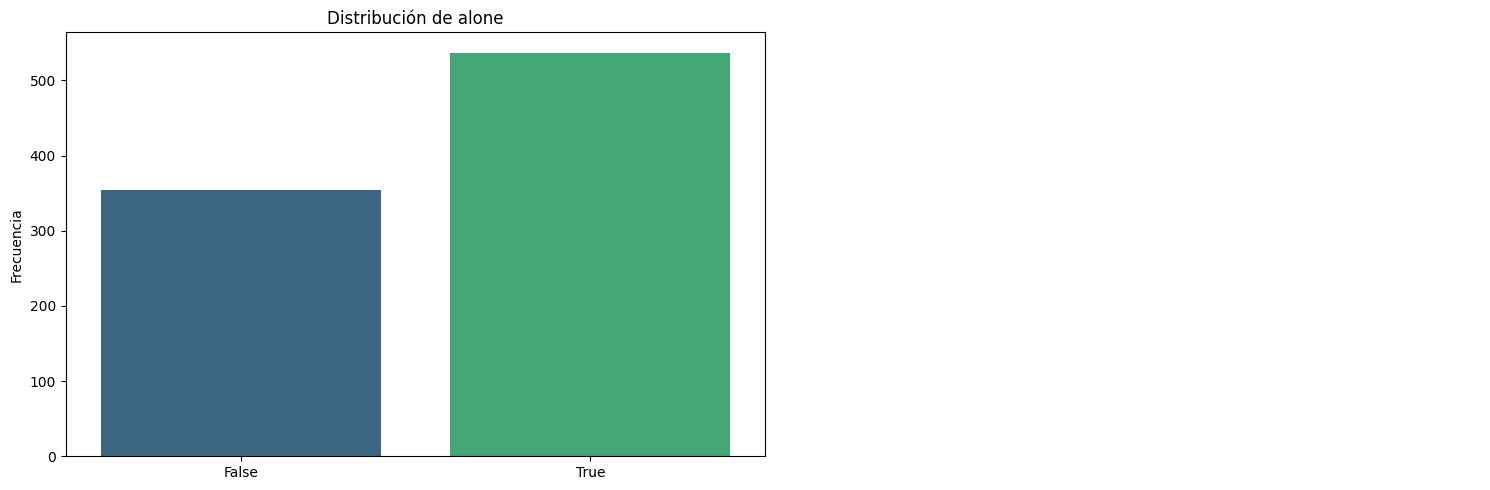

,Frecuencia Absoluta,Frecuencia Relativa
alone,,
True,537,60.26936
False,354,39.73064


In [115]:
pinta_distribucion_categoricas(df_titanic,["alone"], giro=0)
frecuencias(df_titanic,"alone")

* Se observa una mayoria de casos de True (que se quedaron sin familia) 60.2 % frente al 39.7% (de 891)
* Esta variable no nos da mas informacion que el resto de columnas, de hecho los datos coinciden con los de adult_male, habria que investigar si tienen relacion

In [116]:
 # Analizamos sibsp,embarked,class,who,

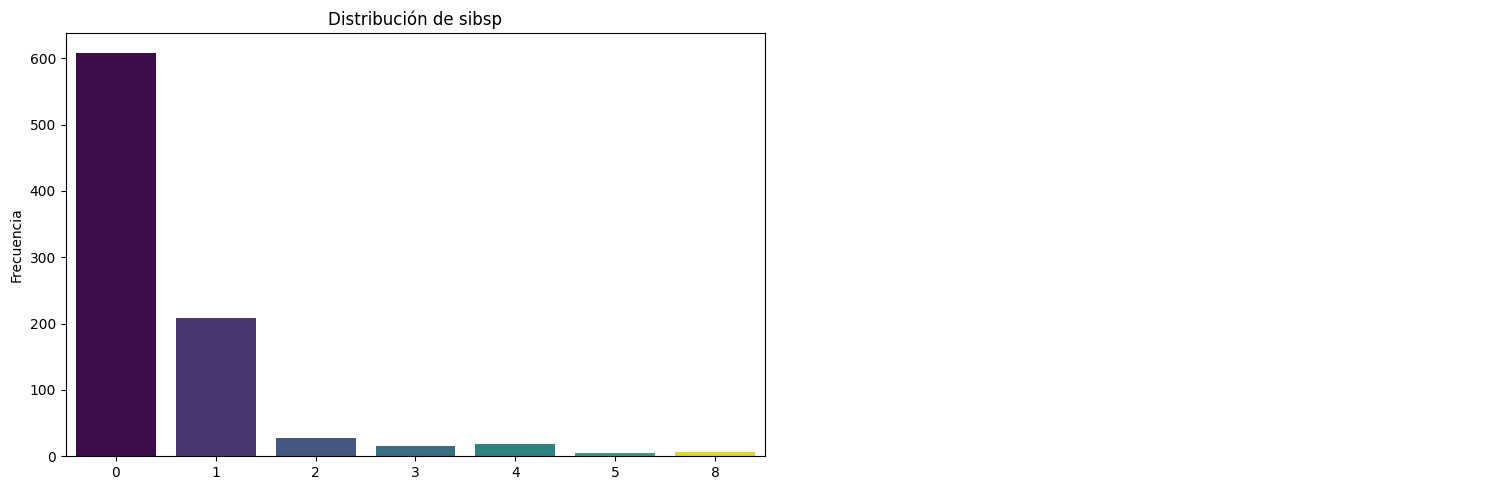

,Frecuencia Absoluta,Frecuencia Relativa
sibsp,,
0,608,68.237935
1,209,23.456790
2,28,3.142536
4,18,2.020202
3,16,1.795735
8,7,0.785634
5,5,0.561167


In [117]:
pinta_distribucion_categoricas(df_titanic,["sibsp"], giro=0)
frecuencias(df_titanic,"sibsp")

* El valor que domina es 0, lo que indica que la mayoria de los pasajeros viajaban solos, sin familia
* El siguiente valor que domina es 1, por lo que un 23,5% viajaba con algun familiar
* Los valores podrian reagruparse para tener informacion binaria, si viajaban con familiares o no
* Puede servir como analisis demografico

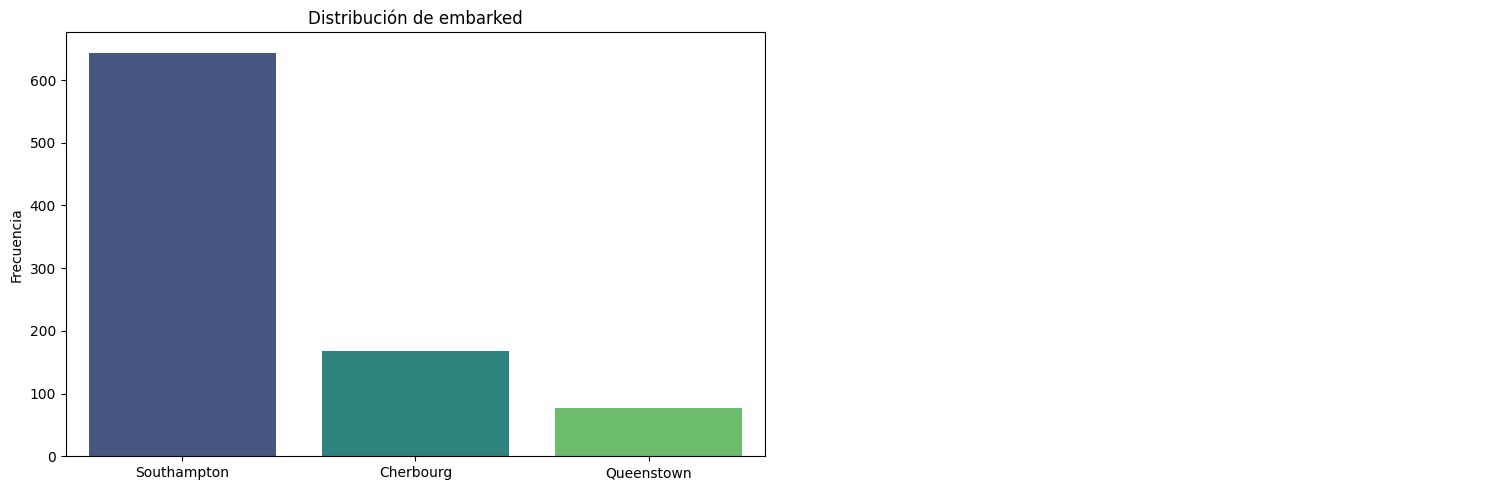

,Frecuencia Absoluta,Frecuencia Relativa
embarked,,
Southampton,644,72.440945
Cherbourg,168,18.897638
Queenstown,77,8.661417


In [118]:
pinta_distribucion_categoricas(df_titanic,["embarked"], giro=0)
frecuencias(df_titanic,"embarked")

* El valor que domina es Southampton, de donde salio la mayoria de viajeros y puerto de origen
* La variable nos da informacion del origen de los pasajeros, puede servir para analisis demograficos
* se puede utilizar tambien junto con survived para ver de donde eran la mayoria de supervivientes

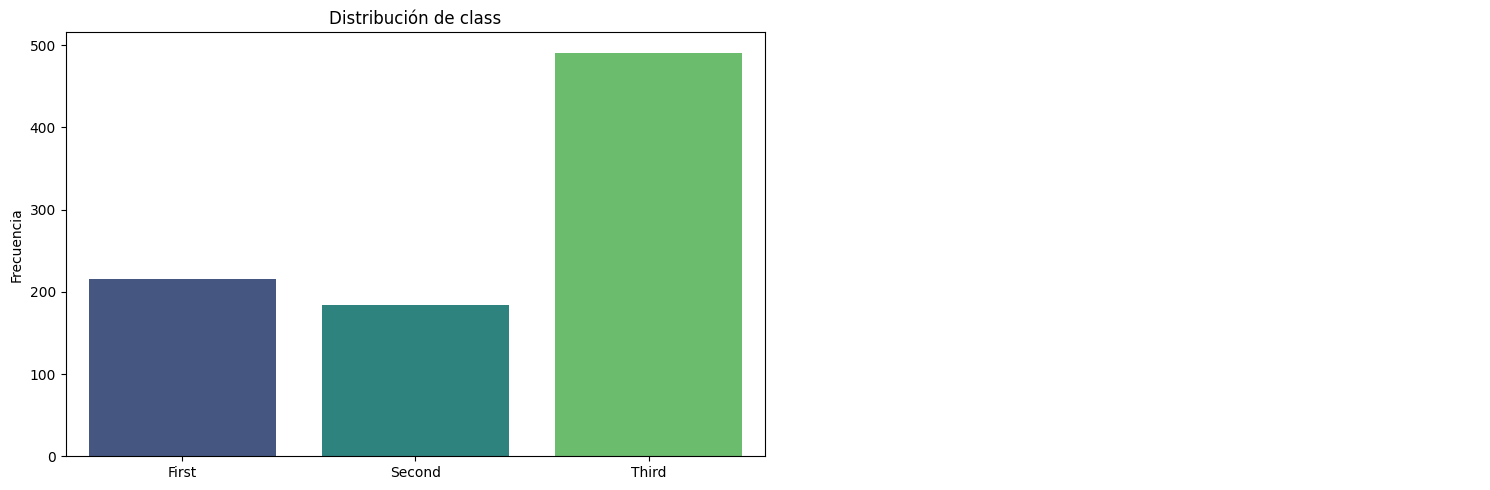

,Frecuencia Absoluta,Frecuencia Relativa
class,,
Third,491,55.106622
First,216,24.242424
Second,184,20.650954


In [120]:
pinta_distribucion_categoricas(df_titanic,["class"], giro=0)
frecuencias(df_titanic,"class")

* Se observa una amplia mayoria, de gente que viajo en tercera clase 55.1%, superando a la primera 21.2% y segunda 20.7%
* Se puede decir que la clase baja es la mayoritaria, habria que ver como afecto a la hora de repartir los salvavidas...
* No se tiene en cuenta a la tripulacion por lo que se ve.

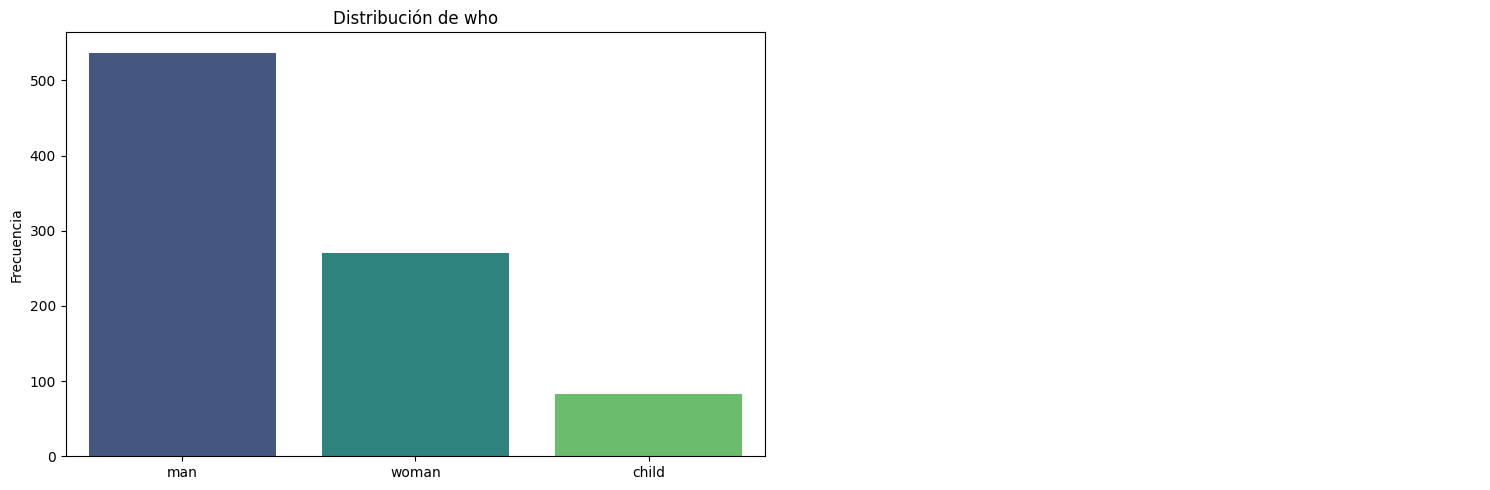

,Frecuencia Absoluta,Frecuencia Relativa
who,,
man,537,60.269360
woman,271,30.415264
child,83,9.315376


In [121]:
pinta_distribucion_categoricas(df_titanic,["who"], giro=0)
frecuencias(df_titanic,"who")

* La mayor parte del personal eran hombres adultos 60.3%, seguido de mujeres 30.4% y niños 9.3%
* Variable totalmente demografica, que no nos da tanta informacion, ya que tenemos genero y sexo de la cual proviene
* puede valer para saber hasta que edad se consideraba la edad de un niño

### #2.2 Numéricas

In [ ]:
# Analizamos las columnas age y fare

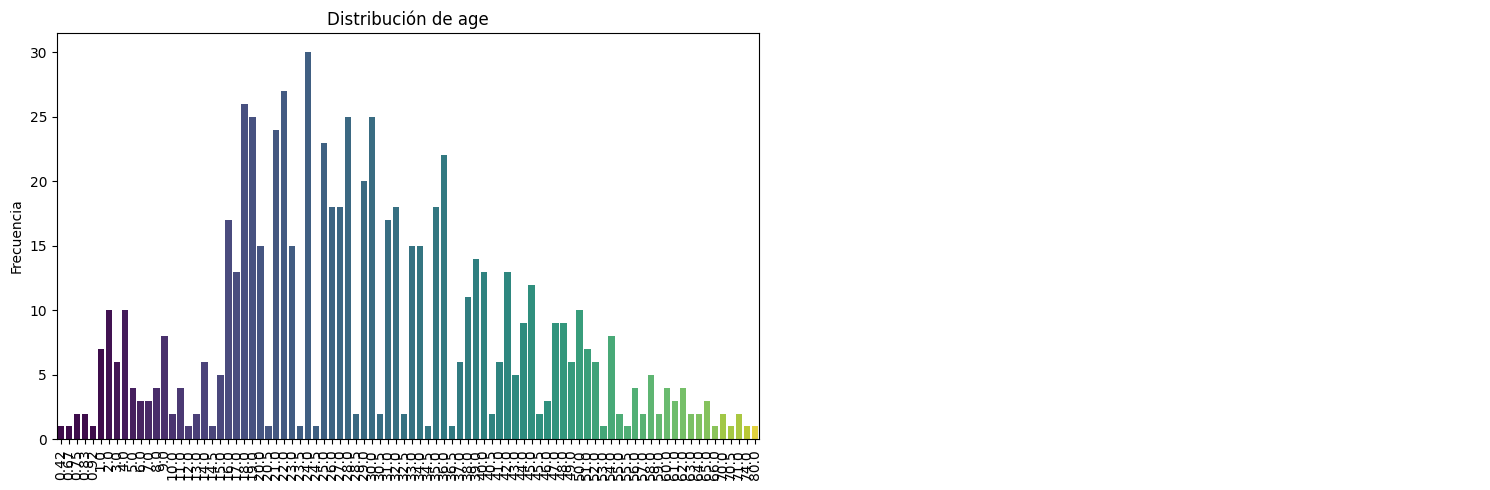

,Frecuencia Absoluta,Frecuencia Relativa
age,,
24.00,30,4.201681
22.00,27,3.781513
18.00,26,3.641457
19.00,25,3.501401
28.00,25,3.501401
...,...,...
36.50,1,0.140056
55.50,1,0.140056
0.92,1,0.140056


In [124]:
pinta_distribucion_categoricas(df_titanic,["age"], giro=90,)
frecuencias(df_titanic,"age")

* Si nos fijamos en los datos, podemos ver que el valor con mas representaciones es el del pasejero de 30 años (4.2%) seguidos de27 y 26 años
* el grupo minoritario parece ser el de personas mayores de 59 años seguido del grupo de niños menores de 16 años
* datos que sirven para estudio demografico y ver, junto con el grupo class y sex como variaron los supervivientes

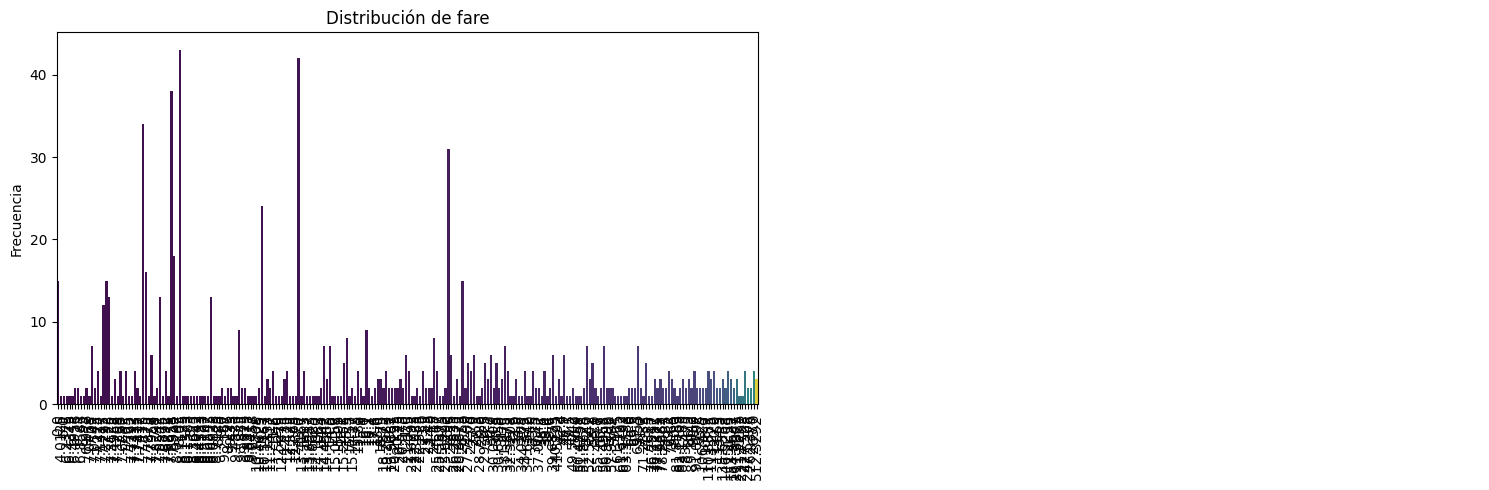

,Frecuencia Absoluta,Frecuencia Relativa
fare,,
8.0500,43,4.826038
13.0000,42,4.713805
7.8958,38,4.264871
7.7500,34,3.815937
26.0000,31,3.479237
...,...,...
35.0000,1,0.112233
28.5000,1,0.112233
6.2375,1,0.112233


In [126]:
# Analizamos las columnas age y fare
pinta_distribucion_categoricas(df_titanic,["fare"], giro=90,)
frecuencias(df_titanic,"fare")

In [133]:
print(df_titanic.fare.max())
print(df_titanic.fare.min())
print(df_titanic.fare.mean())

512.3292
0.0
32.204207968574636


* Variable con muchos datos apelmazados, habria que cambiar los valores para visualizar mejor la grafica
* Mucha dispersion de valores, desde billetes con coste 0 hasta algunos con coste 512 (suponemos que libras)
* Se observan tambien algunos picos de ventas a 8 (43 casos) a 13 (42) a 7.89 (38)
* Podemos pensar que el valor del billete no era fijo y que variaba (posiblemente en funcion de la clase en la que viajases) y su valor medio es de 32.2 pounds
* como dato 1 libra son 1.17 euros de ahora
* ademas se observa bastante dispersion y algunos outliers por encima de 75 libras

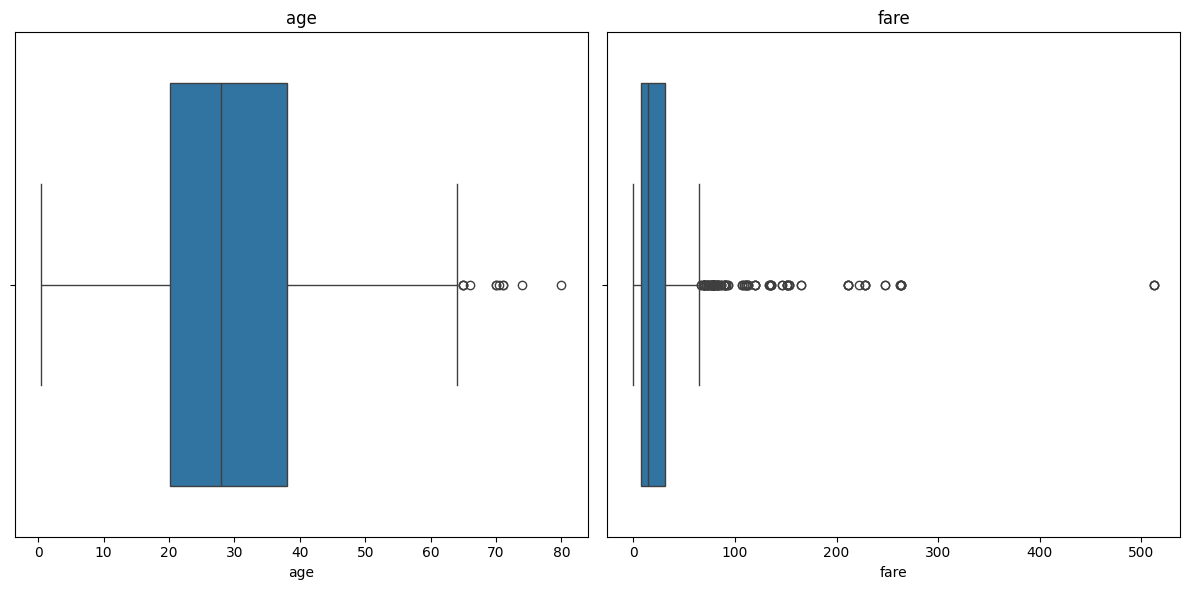

In [134]:
plot_multiple_boxplots(df_titanic,["age","fare"])